# Table of Content 
1. Import Libraries and Data
2. Data Wrangling & Cleaning 
3. The Elbow Technique
4. k-means Clustering
5. Discussion

# 2. Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
#Ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
#Creating the path to import data
path=r'C:\Users\maryg\OneDrive\Career Foundry-Data Anlytics\Data Analytics Immersion\Exercise 6\12.7.23 Project'

In [4]:
#Importing Data
nyc_airbnb = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'upd_clean_nyc_airbnb.pkl'))

In [5]:
nyc_airbnb.shape

(39160, 18)

In [6]:
nyc_airbnb

id    host_id   nbhd_grp                nbhd  \
0                     2595       2845  Manhattan             Midtown   
1                     5121       7356   Brooklyn  Bedford-Stuyvesant   
2                     9357      30193  Manhattan      Hell's Kitchen   
3                     6848      15991   Brooklyn        Williamsburg   
4                    10452      35935   Brooklyn  Bedford-Stuyvesant   
...                    ...        ...        ...                 ...   
39155  1013632380355599044  401202937  Manhattan             Midtown   
39156  1014579690057145481  441448134   Brooklyn  Bedford-Stuyvesant   
39157  1015027293549591335  107434423  Manhattan            Kips Bay   
39158  1015027813525407338  107434423  Manhattan            Kips Bay   
39159  1015028181966283124  107434423  Manhattan            Kips Bay   

        latitude  longitude        room_type  price  min_night_stay  \
0      40.753560 -73.985590  Entire home/apt    240              30   
1      40.685350 -73.955120     Private room     66              30   
2      40.767240 -73.986640  Entire home/apt    175              45   
3      40.709350 -73.953420  Entire home/apt     81              30   
4      40.682940 -73.956820     Private room     90              30   
...          ...        ...              ...    ...             ...   
39155  40.747829 -73.986907     Private room     64               1   
39156  40.689207 -73.936728  Entire home/apt    119              30   
39157  40.744972 -73.977042  Entire home/apt    266              31   
39158  40.740508 -73.978347  Entire home/apt    322              31   
39159  40.739918 -73.978985  Entire home/apt    233              31   

       no_reviews last_review_date  no_monthly_reviews  host_listings_count  \
0              49        6/21/2022                0.29                    3   
1              50        12/2/2019                0.28                    2   
2              58        8/13/2017                0.34                    1   
3             191        8/14/2023                1.09                    1   
4              80        9/16/2023                0.49                    4   
...           ...              ...                 ...                  ...   
39155           0              nan                 NaN                   56   
39156           0              nan                 NaN                    1   
39157           0              nan                 NaN                  647   
39158           0              nan                 NaN                  647   
39159           0              nan                 NaN                  647   

       365_avail  no_of_reviews_ltm  nbhd_no  room_type_no price_range  
0            365                  0        1             1   min price  
1            120                  0        2             2   low price  
2            340                  0        1             1   min price  
3            110                  5        2             1   low price  
4            290                  2        2             2   low price  
...          ...                ...      ...           ...         ...  
39155         62                  0        1             2   low price  
39156        258                  0        2             1   low price  
39157        333                  0        1             1   min price  
39158        365                  0        1             1  high price  
39159        365                  0        1             1   min price  

[39160 rows x 18 columns]

# 3. Data Wrangling & cleaning 

In [7]:
#Removing any categorical columns from dataframe 
nyc_abnb = nyc_airbnb.drop(['nbhd_grp', 'nbhd', 'room_type', 'last_review_date', 'price_range'], axis = 1)

In [8]:
#Check for missing values
nyc_abnb.isnull().sum()

id                         0
host_id                    0
latitude                   0
longitude                  0
price                      0
min_night_stay             0
no_reviews                 0
no_monthly_reviews     10949
host_listings_count        0
365_avail                  0
no_of_reviews_ltm          0
nbhd_no                    0
room_type_no               0
dtype: int64

In [9]:
#Create a dataframe for missing values
nan = nyc_abnb[nyc_airbnb['no_monthly_reviews'].isnull() == True]

In [10]:
nan

id    host_id   latitude  longitude  price  \
6                    11943      45445  40.637020 -73.963270    150   
28                   63588     295128  40.811610 -73.854990     89   
36                   64015     146944  40.728630 -73.984200    200   
55                   68253      67730  40.763360 -73.920990     55   
103                  89427     116599  40.685130 -73.966480    800   
...                    ...        ...        ...        ...    ...   
39155  1013632380355599044  401202937  40.747829 -73.986907     64   
39156  1014579690057145481  441448134  40.689207 -73.936728    119   
39157  1015027293549591335  107434423  40.744972 -73.977042    266   
39158  1015027813525407338  107434423  40.740508 -73.978347    322   
39159  1015028181966283124  107434423  40.739918 -73.978985    233   

       min_night_stay  no_reviews  no_monthly_reviews  host_listings_count  \
6                  30           0                 NaN                    1   
28                 30           0                 NaN                    6   
36                 30           0                 NaN                    1   
55                 30           0                 NaN                    1   
103                30           0                 NaN                    3   
...               ...         ...                 ...                  ...   
39155               1           0                 NaN                   56   
39156              30           0                 NaN                    1   
39157              31           0                 NaN                  647   
39158              31           0                 NaN                  647   
39159              31           0                 NaN                  647   

       365_avail  no_of_reviews_ltm  nbhd_no  room_type_no  
6              0                  0        2             2  
28           262                  0        4             2  
36             0                  0        1             1  
55             0                  0        3             2  
103          358                  0        2             1  
...          ...                ...      ...           ...  
39155         62                  0        1             2  
39156        258                  0        2             1  
39157        333                  0        1             1  
39158        365                  0        1             1  
39159        365                  0        1             1  

[10949 rows x 13 columns]

In [11]:
#Replace the 'NaN' with '0'
nyc_abnb['no_monthly_reviews'] = nyc_abnb['no_monthly_reviews'].fillna(0)

In [12]:
#Rechecking for missing values
nyc_abnb.isnull().sum()

id                     0
host_id                0
latitude               0
longitude              0
price                  0
min_night_stay         0
no_reviews             0
no_monthly_reviews     0
host_listings_count    0
365_avail              0
no_of_reviews_ltm      0
nbhd_no                0
room_type_no           0
dtype: int64

In [13]:
# Clean extreme values
nyc_abnb = nyc_abnb[(nyc_abnb['no_of_reviews_ltm'] <= 100) & (nyc_abnb['min_night_stay'] <= 400) & (nyc_abnb['price'] <= 5000)]

# 3. The Elbow Technique

In [14]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [15]:
score = [kmeans[i].fit(nyc_abnb).score(nyc_abnb) for i in range(len(kmeans))] 
score

C:\Users\maryg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\maryg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\maryg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\maryg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-6.072278599812859e+39,
 -2.355744107152255e+38,
 -6.682931755987974e+37,
 -2.900917174763293e+37,
 -1.6565577913880811e+37,
 -1.0559803900895979e+37,
 -7.067109895969716e+36,
 -5.430950461510753e+36,
 -4.2100164718041096e+36]

In [16]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Dicussion:
Based on the elbow curve the optimal count for the clusters is three. The line rises from 1 to 2 and then rises slily from 2 to 3. After 3 the line begin to even out. 

# 4. k-means Clustering

In [17]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [18]:
# Fit the k-means object to the data.
kmeans.fit(nyc_abnb)

C:\Users\maryg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [19]:
nyc_abnb['clusters'] = kmeans.fit_predict(nyc_abnb)

C:\Users\maryg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
nyc_abnb.head()

id  host_id  latitude  longitude  price  min_night_stay  no_reviews  \
0   2595     2845  40.75356  -73.98559    240              30          49   
1   5121     7356  40.68535  -73.95512     66              30          50   
2   9357    30193  40.76724  -73.98664    175              45          58   
3   6848    15991  40.70935  -73.95342     81              30         191   
4  10452    35935  40.68294  -73.95682     90              30          80   

   no_monthly_reviews  host_listings_count  365_avail  no_of_reviews_ltm  \
0                0.29                    3        365                  0   
1                0.28                    2        120                  0   
2                0.34                    1        340                  0   
3                1.09                    1        110                  5   
4                0.49                    4        290                  2   

   nbhd_no  room_type_no  clusters  
0        1             1         1  
1        2             2         1  
2        1             1         1  
3        2             1         1  
4        2             2         1

In [21]:
nyc_abnb['clusters'].value_counts()

clusters
1    24786
2     7982
0     6270
Name: count, dtype: int64

In [22]:
#Plot the clusters for the 'price' & 'no_of_reviews_ltm' variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=nyc_abnb['price'], y=nyc_abnb['no_of_reviews_ltm'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Price')
plt.ylabel('Number of Reviews in the last 12 months') 
plt.show()


C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


In [23]:
#Plot the clusters for the 'price' & 'min_night_stay' variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=nyc_abnb['price'], y=nyc_abnb['min_night_stay'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Price')
plt.ylabel('Minimum Night Stay') 
plt.show()

C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


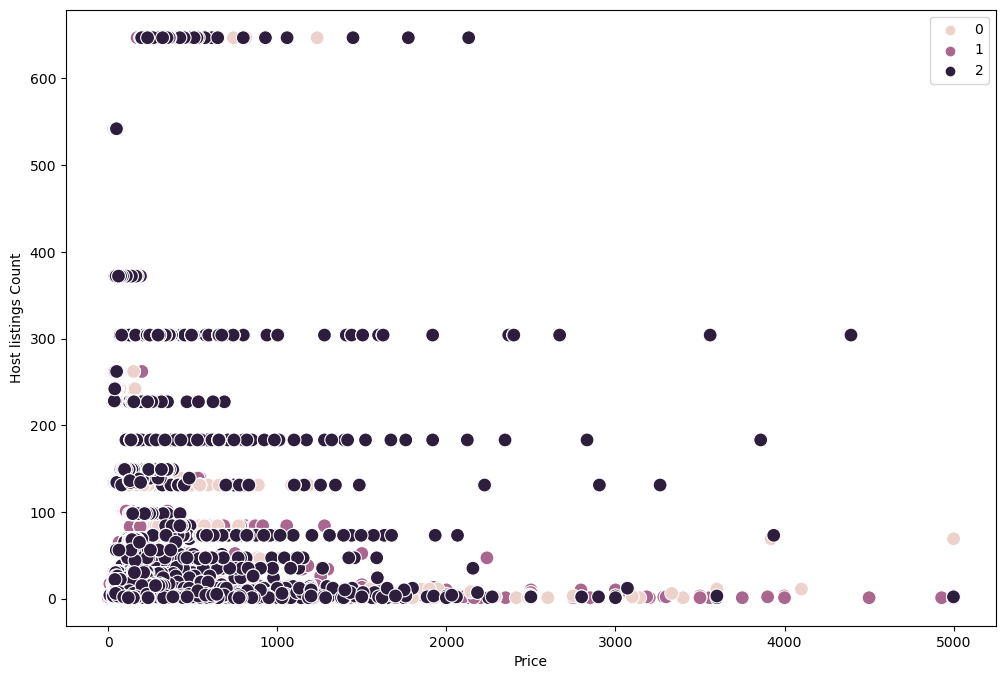

In [24]:
#Plot the clusters for the 'price' & 'host_listings_count' variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=nyc_abnb['price'], y=nyc_abnb['host_listings_count'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Price')
plt.ylabel('Host listings Count') 
plt.show()

In [26]:
nyc_abnb.loc[nyc_abnb['clusters'] == 2, 'cluster'] = 'dark purple'
nyc_abnb.loc[nyc_abnb['clusters'] == 1, 'cluster'] = 'purple'
nyc_abnb.loc[nyc_abnb['clusters'] == 0, 'cluster'] = 'pink'

In [27]:
nyc_abnb.describe()

id       host_id      latitude     longitude         price  \
count  3.903800e+04  3.903800e+04  39038.000000  39038.000000  39038.000000   
mean   2.932073e+17  1.572883e+08     40.729368    -73.945889    194.006788   
std    3.944007e+17  1.692379e+08      0.056691      0.054893    255.924943   
min    2.595000e+03  1.678000e+03     40.500314    -74.251907      0.000000   
25%    1.990689e+07  1.648070e+07     40.688860    -73.982740     76.000000   
50%    4.572217e+07  7.743673e+07     40.726470    -73.953910    130.000000   
75%    7.355955e+17  2.774135e+08     40.762676    -73.926247    219.000000   
max    1.015028e+18  5.442621e+08     40.911380    -73.713650   5000.000000   

       min_night_stay    no_reviews  no_monthly_reviews  host_listings_count  \
count    39038.000000  39038.000000        39038.000000         39038.000000   
mean        30.071110     24.966417            0.744817            39.527922   
std         22.576853     53.092596            1.270104           117.159025   
min          1.000000      0.000000            0.000000             1.000000   
25%         30.000000      0.000000            0.000000             1.000000   
50%         30.000000      4.000000            0.160000             1.000000   
75%         30.000000     23.000000            0.930000             6.000000   
max        400.000000    985.000000           33.640000           647.000000   

          365_avail  no_of_reviews_ltm       nbhd_no  room_type_no  \
count  39038.000000       39038.000000  39038.000000  39038.000000   
mean     153.744403           6.410933      1.816845      1.477381   
std      144.274094          13.179694      0.884069      0.544543   
min        0.000000           0.000000      1.000000      1.000000   
25%        0.000000           0.000000      1.000000      1.000000   
50%      130.000000           0.000000      2.000000      1.000000   
75%      308.000000           5.000000      2.000000      2.000000   
max      365.000000         100.000000      5.000000      4.000000   

           clusters  
count  39038.000000  
mean       1.043855  
std        0.602633  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        2.000000

In [28]:
nyc_abnb

id    host_id   latitude  longitude  price  \
0                     2595       2845  40.753560 -73.985590    240   
1                     5121       7356  40.685350 -73.955120     66   
2                     9357      30193  40.767240 -73.986640    175   
3                     6848      15991  40.709350 -73.953420     81   
4                    10452      35935  40.682940 -73.956820     90   
...                    ...        ...        ...        ...    ...   
39155  1013632380355599044  401202937  40.747829 -73.986907     64   
39156  1014579690057145481  441448134  40.689207 -73.936728    119   
39157  1015027293549591335  107434423  40.744972 -73.977042    266   
39158  1015027813525407338  107434423  40.740508 -73.978347    322   
39159  1015028181966283124  107434423  40.739918 -73.978985    233   

       min_night_stay  no_reviews  no_monthly_reviews  host_listings_count  \
0                  30          49                0.29                    3   
1                  30          50                0.28                    2   
2                  45          58                0.34                    1   
3                  30         191                1.09                    1   
4                  30          80                0.49                    4   
...               ...         ...                 ...                  ...   
39155               1           0                0.00                   56   
39156              30           0                0.00                    1   
39157              31           0                0.00                  647   
39158              31           0                0.00                  647   
39159              31           0                0.00                  647   

       365_avail  no_of_reviews_ltm  nbhd_no  room_type_no  clusters  \
0            365                  0        1             1         1   
1            120                  0        2             2         1   
2            340                  0        1             1         1   
3            110                  5        2             1         1   
4            290                  2        2             2         1   
...          ...                ...      ...           ...       ...   
39155         62                  0        1             2         2   
39156        258                  0        2             1         2   
39157        333                  0        1             1         2   
39158        365                  0        1             1         2   
39159        365                  0        1             1         2   

           cluster  
0           purple  
1           purple  
2           purple  
3           purple  
4           purple  
...            ...  
39155  dark purple  
39156  dark purple  
39157  dark purple  
39158  dark purple  
39159  dark purple  

[39038 rows x 15 columns]

In [29]:
nyc_abnb.groupby('cluster').agg({'price':['mean', 'median'], 
                         'min_night_stay':['mean', 'median'], 
                         'no_of_reviews_ltm':['mean', 'median'],
                        'room_type_no':['mean', 'median'],
                          'host_listings_count':['mean', 'median']})
#Room Type Numbers: Entire home/apt (1), Private room (2), Shared room (3), Hotel room (4)

price        min_night_stay        no_of_reviews_ltm         \
                   mean median           mean median              mean median   
cluster                                                                         
dark purple  245.191932  150.0      26.209722   30.0          3.903533    0.0   
pink         214.006220  149.0      29.819936   30.0         12.084370    3.0   
purple       172.464133  120.0      31.378157   30.0          5.783224    0.0   

            room_type_no        host_listings_count         
                    mean median                mean median  
cluster                                                     
dark purple     1.477324    1.0           74.507767    4.0  
pink            1.449123    1.0           54.525837    2.0  
purple          1.484548    1.0           24.469176    1.0

In [30]:
#Export dataframe
nyc_abnb.to_csv(os.path.join(path, '02 Data','Prepared Data', 'nyc_airbnb.csv'))

# 5. Discussion: 
Judging by these statistics I can state a few facts:
1. Group 'dark purple' has the most bookings (based on no_of_reviews_ltm) and stay in entire homes/apartments above average price. The host owns more than the average Airbnb listings. 
2. The 'pink' group are more frugal and book entire homes/apartments below the average price, stay longer, and the host owns the least number of Airbnbs. 
3. Group 'purple' has the least bookings (based on no_of_reviews_ltm) but stay in the most expensive entire homes/apartments and the host owns the most listing than any other group. 

Other Findings:
4. It seems that Airbnbs owned by hosts with high Airbnb listings are more expensive and vice versa. 
5. The minimum night stay doesn't seem to change much across groups 
6. The same statement above applies to room types; All groups prefer to stay in  entire homes/apartments

Model Notes:
The model helps identify profiles of guests and their preferences. I wish the groups had a bigger gap in their differences to make is more visual pleasing and to separate them with more ease.
